### Author: Tayfun Tumkaya (tayfuntumkaya@gmail.com) 
### April, 2020

##### Useful links
##### 1. ML Book: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
##### 2. Cross-validation types: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
##### 3. Nested Cross Validation: 'https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py'
##### 4. Recersuive feature selection using CV: ##### https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
##### 5. MSE plot: https://stats.stackexchange.com/questions/61783/bias-and-variance-in-leave-one-out-vs-k-fold-cross-validation/357749#357749
##### 6. ROC-curve probability threshold varied: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
plt.rcParams['pdf.fonttype'] = 42

In [2]:
df_knaden = pd.read_csv("Knaden_Hallem_datasets.csv", encoding = "ISO-8859-1")

In [3]:
## Classify the odors as aversive, attractive, neutral
# conditions = [
#     (df_knaden['Level of significance'] <= 0.05) & (df_knaden['Attraction index'] < 0),
#     (df_knaden['Level of significance'] <= 0.05) & (df_knaden['Attraction index'] > 0),
#     ]

# # choices = ['aversive', 'attractive']
# choices = ['valent', 'valent']
# new_col = np.select(conditions, choices, default='neutral')
# df_knaden.insert(loc=1, column='Valence_class', value=new_col)

In [3]:
## select Single Sensillum Recording data for 24 receptors
SSR_df = df_knaden.iloc[:,5:]

In [4]:
#SSR_df.to_csv("/Users/Tayfun/Desktop/Codes/OdorValPrediction/SSR_dataset.csv", index=False)

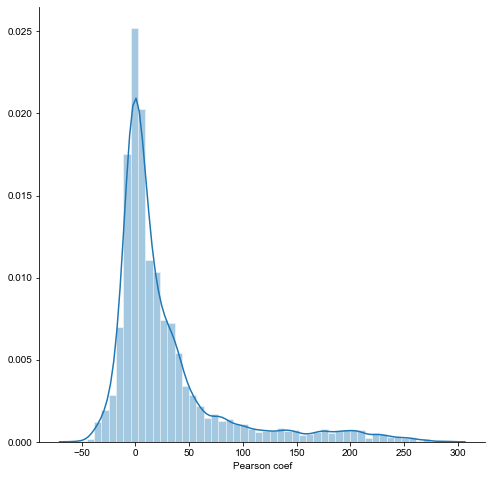

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

sns.set(style="white")
ax = sns.distplot(SSR_df)
plt.xlabel('Pearson coef')
sns.despine()
# fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/odor_valence_corr.pdf", dpi=600)

In [ ]:
# def transform_wTSALE(df_wTSALE, df_SSR):

#     ## collect my data for the 23 ORNs
#     temp_14 = {}
#     temp_42 = {}
#     temp_70 = {}
#     temp_mean = {}

#     for i in df_SSR.columns:
#         OR_name = 'Or' + str(i)

#         ES_14 = df_wTSALE[(df_wTSALE["ORNs"] == OR_name) & (df_wTSALE["LightIntensity"] == "14uW")]["ES"].values
#         temp_14[OR_name[2:]] = ES_14

#         ES_42 = df_wTSALE[(df_wTSALE["ORNs"] == OR_name) & (df_wTSALE["LightIntensity"] == "42uW")]["ES"].values
#         temp_42[OR_name[2:]] = ES_42

#         ES_70 = df_wTSALE[(df_wTSALE["ORNs"] == OR_name) & (df_wTSALE["LightIntensity"] == "70uW")]["ES"].values
#         temp_70[OR_name[2:]] = ES_70

#         temp_mean[OR_name[2:]] = (ES_14 + ES_42 + ES_70) / 3.

#     df_wTSALE_ES_14 = pd.DataFrame(temp_14, columns=df_SSR.columns)
#     df_wTSALE_ES_42 = pd.DataFrame(temp_42, columns=df_SSR.columns)
#     df_wTSALE_ES_70 = pd.DataFrame(temp_70, columns=df_SSR.columns)
#     df_wTSALE_ES_mean = pd.DataFrame(temp_mean, columns=df_SSR.columns)
    
#     ## Activity-weighted wTSALE scores: multiply the wTSALEs with the neuronal activity (SSR data)
#     df_AWwTSALE_14 = df_SSR.apply(lambda x: x*(df_wTSALE_ES_14.values[0]), axis=1)
#     df_AWwTSALE_42 = df_SSR.apply(lambda x: x*(df_wTSALE_ES_42.values[0]), axis=1)
#     df_AWwTSALE_70 = df_SSR.apply(lambda x: x*(df_wTSALE_ES_70.values[0]), axis=1)
#     df_wTSALE_ES_mean = df_SSR.apply(lambda x: x*(df_wTSALE_ES_mean.values[0]), axis=1)
    
#     ## Add the odor, valence labels
#     df_AWwTSALE_14 = pd.concat([df_knaden.iloc[:,:4], df_AWwTSALE_14], axis=1)
#     df_AWwTSALE_42 = pd.concat([df_knaden.iloc[:,:4], df_AWwTSALE_42], axis=1)
#     df_AWwTSALE_70 = pd.concat([df_knaden.iloc[:,:4], df_AWwTSALE_70], axis=1)
#     df_wTSALE_ES_mean = pd.concat([df_knaden.iloc[:,:4], df_wTSALE_ES_mean], axis=1)
    
#     return df_AWwTSALE_14, df_AWwTSALE_42, df_AWwTSALE_70, df_wTSALE_ES_mean

In [6]:
df_wTSALE = pd.read_csv("WALIforest_of_male_fed_noair.csv")

# df_wTSALE_scaled = df_wTSALE.copy()
# scaler0 = preprocessing.MinMaxScaler(feature_range=(-1,1))

# df_wTSALE_scaled['ES'] = scaler0.fit_transform(df_wTSALE_scaled['ES'].values.reshape(-1, 1))

## select the 23 ORNs
ORN_list = SSR_df.columns.to_list()
ORN_list = ['Or' + i for i in ORN_list] 

df_wTSALE_23ORNs = df_wTSALE[df_wTSALE['ORNs'].isin(ORN_list)]
df_wTSALE_23ORNs

,Unnamed: 0,ORNs,LightIntensity,Sex-Satiety-Air,ES,CIs,pVal,parent_n,parent_std,offspring_n,offspring_std,ExpConditions
9,39,Or10a,14uW,male_fed_NoAir,0.074517,"[-0.09511479124700001, 0.25341022960799997]",0.404088,104,0.483980,51,0.487964,14uW_male_fed_NoAir
10,40,Or10a,42uW,male_fed_NoAir,0.196138,"[0.05542601910569999, 0.341033011997]",0.009221,104,0.409470,51,0.417932,42uW_male_fed_NoAir
11,41,Or10a,70uW,male_fed_NoAir,0.114872,"[-0.08760482561760001, 0.309206729025]",0.190636,104,0.406958,51,0.617060,70uW_male_fed_NoAir
15,63,Or19a,14uW,male_fed_NoAir,0.074936,"[-0.09750626440310001, 0.252932636268]",0.408516,103,0.517287,52,0.512818,14uW_male_fed_NoAir
16,64,Or19a,42uW,male_fed_NoAir,-0.002038,"[-0.115519762377, 0.11071073512700001]",0.974263,104,0.397197,52,0.296419,42uW_male_fed_NoAir
...,...,...,...,...,...,...,...,...,...,...,...,...
156,636,Or98a,42uW,male_fed_NoAir,-0.112332,"[-0.237701585056, 0.00558473811133]",0.065696,101,0.337134,52,0.372051,42uW_male_fed_NoAir
157,637,Or98a,70uW,male_fed_NoAir,0.042841,"[-0.0732454587545, 0.160196808988]",0.447677,101,0.302240,52,0.369386,70uW_male_fed_NoAir
158,647,Or9a,14uW,male_fed_NoAir,0.074070,"[-0.10267880170299999, 0.25639070630800004]",0.406094,104,0.424967,52,0.509900,14uW_male_fed_NoAir
159,648,Or9a,42uW,male_fed_NoAir,0.035658,"[-0.199150853261, 0.261037930818]",0.723076,104,0.431478,52,0.648645,42uW_male_fed_NoAir


In [ ]:
## Scale the Physiolgy and WALISAR datasets
# scaler1 = preprocessing.StandardScaler()
# scaler1 = preprocessing.MinMaxScaler(feature_range=(-1,1))
# df_wTSALE_23ORNs_scaled = df_wTSALE_23ORNs.copy() 
# df_wTSALE_23ORNs_scaled['ES'] = scaler1.fit_transform(df_wTSALE_23ORNs_scaled['ES'].values.reshape(-1, 1))

# # scaler2 = preprocessing.StandardScaler()
# SSR_df_scaled = SSR_df.copy()
# SSR_df_scaled[SSR_df_scaled.columns] = scaler2.fit_transform(SSR_df_scaled[SSR_df_scaled.columns])

In [ ]:
# sns.set(style="white")
# sns.distplot(df_wTSALE_23ORNs_scaled['ES'])
# sns.despine()

In [ ]:
## Try scaling the datasets separately before combining

## Create Activity-weighted wTSALE dataframes
# df_transformed_14, df_transformed_42, df_transformed_70, df_transformed_mean = transform_wTSALE(df_wTSALE_23ORNs_scaled, SSR_df)

# ## All data points for the three intensities
# df_AWwTSALE_All_Intensities = pd.concat([df_transformed_14, df_transformed_42, df_transformed_70])

In [ ]:
# ## get predictors and the target
# x = df_transformed_mean.iloc[:, 4:]
# y = df_transformed_mean.iloc[:, 1]

## instead of standardizing the SSR data, first I multiply them with wTSALE, and THEN standardize them here
# scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
# scaler = preprocessing.MaxAbsScaler()
# x_scaled = x.copy()

# x_scaled[x_scaled.columns] = scaler.fit_transform(x_scaled[x_scaled.columns])


In [ ]:
#creating labelEncoder
# labeler = preprocessing.LabelEncoder()

# Converting string labels into numbers.
# y_encoded = labeler.fit_transform(y)
# print(y_encoded)

### Dataset without WALISAR

In [7]:
two_DFs = SSR_df.copy()
# two_DFs['Class'] = df_knaden['Valence_class']
two_DFs['Valence'] = df_knaden['Attraction index']
two_DFs['Odorant'] = df_knaden['Odorant']
two_DFs

,7a,9a,10a,19a,22a,23a,33b,35a,43a,43b,...,67a,67c,82a,85a,85b,85f,88a,98a,Valence,Odorant
0,200,57,123,-15,32,-5,-5,83,36,12,...,200,6,-10,7,37,49,-3,30,-0.53,Benzaldehyd
1,31,6,-14,125,52,3,29,26,-6,1,...,84,7,12,-16,51,4,-2,140,-0.42,Linalool
2,-27,36,-17,-16,9,-8,-16,-12,77,35,...,57,2,-14,-14,27,31,-14,-21,-0.40,2-Methylphenol
3,10,62,254,5,32,-6,-16,10,37,10,...,184,35,-16,-25,22,84,-12,29,-0.30,Acetophenon
4,-18,20,-18,92,53,1,3,222,-13,28,...,44,11,35,4,56,10,-20,24,-0.28,1-Octanol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-15,247,-5,-19,50,-4,36,4,-11,110,...,13,35,24,13,16,9,0,8,0.62,"2,3 Butanedione"
106,3,22,19,30,117,3,22,7,5,7,...,20,12,19,-11,40,21,-5,13,0.62,Hexanoic acid
107,-14,14,31,0,33,-8,-6,5,-9,8,...,5,12,-8,-9,14,7,0,4,0.62,Methanoic acid
108,-10,14,2,-10,7,-9,-3,-3,-5,3,...,4,31,-7,-6,39,14,-1,1,0.70,4-ethylguaiacol


In [8]:
## get predictors and the target
x_twoDatasets = two_DFs.iloc[:, :-2]
y_twoDatasets = two_DFs.iloc[:, -2]

# ## scale x
# scaler_twoDatasets = preprocessing.StandardScaler()

# x_twoDatasets_scaled = x_twoDatasets.copy()
# x_twoDatasets_scaled[x_twoDatasets_scaled.columns] = scaler_twoDatasets.fit_transform(x_twoDatasets_scaled[x_twoDatasets_scaled.columns])

## encode y
# labeler_twoDatasets = preprocessing.LabelEncoder()

# Converting string labels into numbers.
# y_twoDatasets_encoded = labeler_twoDatasets.fit_transform(y_twoDatasets)

In [9]:
x_twoDatasets
# y_twoDatasets

,7a,9a,10a,19a,22a,23a,33b,35a,43a,43b,...,59b,65a,67a,67c,82a,85a,85b,85f,88a,98a
0,200,57,123,-15,32,-5,-5,83,36,12,...,6,-10,200,6,-10,7,37,49,-3,30
1,31,6,-14,125,52,3,29,26,-6,1,...,-8,2,84,7,12,-16,51,4,-2,140
2,-27,36,-17,-16,9,-8,-16,-12,77,35,...,-7,-18,57,2,-14,-14,27,31,-14,-21
3,10,62,254,5,32,-6,-16,10,37,10,...,5,12,184,35,-16,-25,22,84,-12,29
4,-18,20,-18,92,53,1,3,222,-13,28,...,-7,-4,44,11,35,4,56,10,-20,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-15,247,-5,-19,50,-4,36,4,-11,110,...,10,-6,13,35,24,13,16,9,0,8
106,3,22,19,30,117,3,22,7,5,7,...,29,7,20,12,19,-11,40,21,-5,13
107,-14,14,31,0,33,-8,-6,5,-9,8,...,25,2,5,12,-8,-9,14,7,0,4
108,-10,14,2,-10,7,-9,-3,-3,-5,3,...,6,-8,4,31,-7,-6,39,14,-1,1


# Pre-Classfication Analysis

## PCA

In [211]:
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit(x_twoDatasets,)
exp_var = np.cumsum(principalComponents.explained_variance_ratio_)


In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax = sns.lineplot(x = range(len(principalComponents.explained_variance_ratio_)),
             y = np.cumsum(principalComponents.explained_variance_ratio_))

ax.set_xlabel("N components", fontsize = 18)
ax.set_ylabel("Variance explained", fontsize = 18)

sns.despine()
# fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/DimReduction/PCA_ExplainedVar.pdf", dpi=600)

In [ ]:
pca = PCA(n_components = 2)
x_2D_fit = pca.fit(x)
x_2D = x_2D_fit.transform(x)

print("Variance explained by two PCs:", x_2D_fit.explained_variance_ratio_)

PC_Df = pd.DataFrame(data = x_2D,
             columns = ['PC1', 'PC2'])

y_encoded_DF = pd.DataFrame({"Class":y_encoded}) 
PC2_Df = pd.concat([PC_Df, y_encoded_DF], axis = 1)


In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax = sns.scatterplot(x='PC1', y='PC2', hue = "Class", data=PC2_Df,
                    s = 50)

ax.set_xlabel("PC1 (%.2f)" % (x_2D_fit.explained_variance_ratio_[0]), fontsize = 18)
ax.set_ylabel("PC2 (%.2f)" % (x_2D_fit.explained_variance_ratio_[1]), fontsize = 18)

sns.despine()
# fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/DimReduction/PCA_projection.pdf", dpi=600)

In [213]:
pca = PCA(n_components=.9)

x_PCA_var_k_retained = pca.fit_transform(x_twoDatasets)
x_PCA_var_k_retained.shape


(110, 10)

## NCA

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)
nca_components = nca.fit(x, y_encoded)
x_NCA_2D = nca.transform(x)

NC_Df = pd.DataFrame(data = x_NCA_2D,
             columns = ['NC1', 'NC2'])

y_encoded_DF = pd.DataFrame({"Class":y_encoded}) 
NC2_Df = pd.concat([NC_Df, y_encoded_DF], axis = 1)


In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax = sns.scatterplot(x='NC1', y='NC2', hue = "Class", data=NC2_Df,
                    s = 50)

ax.set_xlabel("NC1", fontsize = 18)
ax.set_ylabel("NC2", fontsize = 18)

sns.despine()
fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/DimReduction/NCA_projection.pdf", dpi=600)

In [ ]:
## Keep K variables for classification
nca = NeighborhoodComponentsAnalysis(n_components=10, random_state=42)
nca_components = nca.fit(x, y_encoded)
x_NCA = nca.transform(x)
x_NCA.shape

## UMAP

In [ ]:
# import umap

um_components = umap.UMAP().fit(x_scaled)
um_2D = um_components.transform(x_scaled)

UMAP_Df = pd.DataFrame(data = um_2D,
             columns = ['UP1', 'UP2'])

y_encoded_DF = pd.DataFrame({"Class":y_encoded}) 
UMAP2_Df = pd.concat([UMAP_Df, y_encoded_DF], axis = 1)

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax = sns.scatterplot(x='UP1', y='UP2', hue = "Class", data=UMAP2_Df,
                    s = 50)

ax.set_xlabel("UP1", fontsize = 18)
ax.set_ylabel("UP2", fontsize = 18)

sns.despine()

## PLS-DA

In [11]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=2, scale=False)
# x_PLSDA_2D = pls.fit(x_scaled, y_encoded)
# x_PLSDA_2D = pls.fit(x, y_encoded)
# x_PLSDA_2D = pls.fit(x_twoDatasets, y_twoDatasets_encoded)
x_PLSDA_2D = pls.fit(x_twoDatasets, y_twoDatasets)

PLS_Df = pd.DataFrame(data = x_PLSDA_2D.x_scores_,
             columns = ['LV1', 'LV2'])

y_encoded_DF = pd.DataFrame({"Class":y_twoDatasets}) 
PLS2_Df = pd.concat([PLS_Df, y_encoded_DF], axis = 1)
PLS2_Df['Class'] = PLS2_Df['Class'].apply(lambda x:'valent' if x == 1 else 'neutral')

## Keep contiunuous Valence Scores for the regression
PLS2_Df['Valence'] = y_twoDatasets

In [12]:
PLS2_Df

,LV1,LV2,Class,Valence
0,90.229755,-96.283189,neutral,-0.53
1,54.140395,-105.256012,neutral,-0.42
2,-37.874733,-130.873094,neutral,-0.40
3,60.662184,-92.190531,neutral,-0.30
4,-7.926627,14.802924,neutral,-0.28
...,...,...,...,...
105,-130.942107,190.205819,neutral,0.62
106,-58.329582,-5.327440,neutral,0.62
107,-104.241164,-17.957988,neutral,0.62
108,-108.825315,-20.217675,neutral,0.70


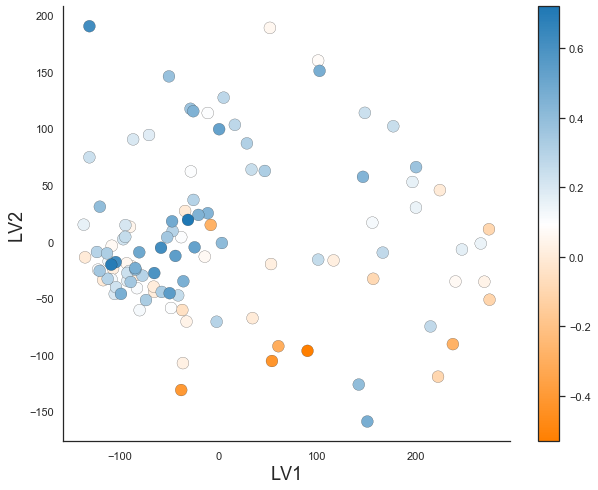

In [365]:
sns.set(style='white')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

# color_dict = dict({'neutral':sns.color_palette("Paired")[1],
#                    'valent':sns.color_palette("Paired")[7]})

## Make a custom colormap

import matplotlib.colors
cc = matplotlib.colors.ColorConverter()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [cc.to_rgba(sns.color_palette("Paired")[7], alpha = 1), "white", cc.to_rgba(sns.color_palette("Paired")[1], alpha = 1)])

ax = plt.scatter(x='LV1', y='LV2', c = "Valence", data=PLS2_Df,
                 edgecolors='k', linewidths=.2, s = 140, cmap=cmap)

plt.colorbar(ax)

plt.xlabel("LV1", fontsize = 18)
plt.ylabel("LV2", fontsize = 18)

# legend = ax.legend()
# legend.texts[0].set_text("")
# legend.draw_frame(False)

sns.despine()
fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/LinearRegression/SSR_23ORNs_wTSALE_PLSDA_projection_linearReg.pdf", dpi=600)

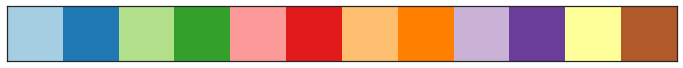

In [354]:
sns.palplot(sns.color_palette("Paired"))

In [ ]:
# ## Adapted from https://scipython.com/book/chapter-7-matplotlib/examples/bmi-data-with-confidence-ellipses/

# from matplotlib.patches import Ellipse

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(1,1,1)
# sns.set(style='white')

# def get_cov_ellipse(cov, centre, nstd, **kwargs):
#     """
#     Return a matplotlib Ellipse patch representing the covariance matrix
#     cov centred at centre and scaled by the factor nstd.

#     """

#     # Find and sort eigenvalues and eigenvectors into descending order
#     eigvals, eigvecs = np.linalg.eigh(cov)
#     order = eigvals.argsort()[::-1]
#     eigvals, eigvecs = eigvals[order], eigvecs[:, order]

#     # The anti-clockwise angle to rotate our ellipse by 
#     vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
#     theta = np.arctan2(vy, vx)

#     # Width and height of ellipse to draw
#     width, height = 2 * nstd * np.sqrt(eigvals)
#     return Ellipse(xy=centre, width=width, height=height,
#                    angle=np.degrees(theta), **kwargs)

# neutral, valent = 0, 1
# labels, colours =['neutral', 'valent'], ['mediumseagreen', 'coral']

# for v in (neutral, valent):
    
#     select_data = PLS2_Df[PLS2_Df['Class']==v]
#     LV1_mean = np.mean(select_data['LV1'])
#     LV2_mean = np.mean(select_data['LV2'])
    
#     cov = np.cov(select_data['LV2'], select_data['LV1'])

#     ax.scatter(select_data['LV1'], select_data['LV2'], color=colours[v],
#                label=labels[v], s = 50)
    
#     e = get_cov_ellipse(cov, (LV1_mean, LV2_mean), 2,
#                         fc = colours[v], alpha=0.1)
#     ax.add_artist(e)

# # ax.set_xlim(140, 210)
# # ax.set_ylim(30, 120)
# ax.set_xlabel('LV1')
# ax.set_ylabel('LV2')
# ax.legend(loc='upper left', scatterpoints=1)

# plt.show()

### Visualizing the 4 dimensions

In [ ]:
y_encoded_DF = pd.DataFrame({"Class":y_twoDatasets_encoded}) 
df_x_scores = pd.concat([df_x_scores, y_encoded_DF], axis = 1)

In [ ]:
df_x_scores

In [ ]:
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

color_dict = dict({'neutral':sns.color_palette("Paired")[1],
                   'valent':sns.color_palette("Paired")[7]})

pc = parallel_coordinates(df_x_scores, 'Class',ax=ax, axvlines = True, color=(sns.color_palette("Paired")[7], sns.color_palette("Paired")[1]))
sns.despine()

In [ ]:
from pandas.plotting import radviz

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
sns.despine()

radviz(df_x_scores, 'Class', ax = ax,s=90, color=(sns.color_palette("Paired")[7], sns.color_palette("Paired")[1]))
# fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/PLSDA_4LVs_Radviz_plot.pdf", dpi=600)

### Paired-rug plot

In [ ]:
## Decision boundaries
## Some useful links: https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
## https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
## https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
## http://kevinyuan.ca/2016/08/01/Interpreting-Logistic-Regression/
## https://stats.stackexchange.com/questions/73320/how-to-visualize-a-fitted-multiple-regression-model

def get_contour_vals(x, y, df, clf, xlim, ylim):        
    
    h = 4  # step size in the mesh

#     X1 = np.repeat(df['LV1'].mean(), np.arange(df['LV1'].min()-10, df['LV1'].max()+10, h).shape[0])   
#     X2 = np.repeat(df['LV2'].mean(), np.arange(df['LV2'].min()-10, df['LV2'].max()+10, h).shape[0])   
#     X3 = np.repeat(df['LV3'].mean(), np.arange(df['LV3'].min()-10, df['LV3'].max()+10, h).shape[0])   
#     X4 = np.repeat(df['LV4'].mean(), np.arange(df['LV4'].min()-10, df['LV4'].max()+10, h).shape[0])   

#     if x == 'LV1':
#         X1 = np.arange(df[x].min()-10, df[x].max()+10, h)   
                   
#     elif x == 'LV2':
#         X2 = np.arange(df[x].min()-10, df[x].max()+10, h)
                   
#     elif x == 'LV3':
#         X3 = np.arange(df[x].min()-10, df[x].max()+10, h)
                   
#     elif x == 'LV4':
#         X4 = np.arange(df[x].min()-10, df[x].max()+10, h) 
#     else:
#         None

#     if y == 'LV1':
#         X1 = np.arange(df[y].min()-10, df[y].max()+10, h)
#     elif y == 'LV2':
#         X2 =  np.arange(df[y].min()-10, df[y].max()+10, h)        
#     elif y == 'LV3':
#         X3 =  np.arange(df[y].min()-10, df[y].max()+10, h)          
#     elif y == 'LV4':
#         X4 = np.arange(df[y].min()-10, df[y].max()+10, h)
#     else:
#         None
        
    X1 = np.repeat(df['LV1'].mean(), np.arange(xlim[0], xlim[1], h).shape[0])   
    X2 = np.repeat(df['LV2'].mean(), np.arange(xlim[0], xlim[1], h).shape[0])   
    X3 = np.repeat(df['LV3'].mean(), np.arange(xlim[0], xlim[1], h).shape[0])   
    X4 = np.repeat(df['LV4'].mean(), np.arange(xlim[0], xlim[1], h).shape[0])   

    if x == 'LV1':
        X1 = np.arange(xlim[0], xlim[1], h)   
                   
    elif x == 'LV2':
        X2 = np.arange(xlim[0], xlim[1], h)
                   
    elif x == 'LV3':
        X3 = np.arange(xlim[0], xlim[1], h)
                   
    elif x == 'LV4':
        X4 = np.arange(xlim[0], xlim[1], h) 
    else:
        None

    if y == 'LV1':
        X1 = np.arange(ylim[0], ylim[1], h)
    elif y == 'LV2':
        X2 =  np.arange(ylim[0], ylim[1], h)        
    elif y == 'LV3':
        X3 =  np.arange(ylim[0], ylim[1], h)          
    elif y == 'LV4':
        X4 = np.arange(ylim[0], ylim[1], h)
    else:
        None
        
    xx1, xx2, xx3, xx4 = np.meshgrid(X1, X2, X3, X4)
    Z = clf.predict_proba(np.c_[xx1.ravel(), xx2.ravel(), xx3.ravel(), xx4.ravel()])[:,1].reshape(xx4.shape)

    return xx1, xx2, xx3, xx4, Z

In [ ]:
LV_x = 'LV2'
LV_y = 'LV4'
x_lim = (-193.4747952708145-10, 215.67717387636728-10)
y_lim = (-193.4747952708145-10, 350.52917727971834-10)
color_dict = dict({0:sns.color_palette("Paired")[1],
                   1:sns.color_palette("Paired")[7]})

# X1, X2, X3, X4, Z = get_contour_vals(LV_x, LV_y, df_x_scores.iloc[:,:4], logisticRegr_not_weighted, x_lim, y_lim)

f, ax = plt.subplots(figsize=(8, 6))
ax.contourf(X2[:,1,1,:], X4[:,1,1,:], Z[:,1,1,:],1200, cmap=cmap, vmin=0, vmax=1, antialiased=True)
ax.contour(X2[:,1,1,:], X4[:,1,1,:], Z[:,1,1,:],levels=[.5],linewidths=.25, cmap='Greys', vmin=0, vmax=1)

# for c in ax.collections:
#     c.set_edgecolor('face')
    
ax = sns.scatterplot(x= 'LV2', y= 'LV4', hue = 'Class', data=df_x_scores, s=80, linewidth=0, legend=False, palette=color_dict)

In [ ]:
for c in ax.collections:
    print(c)

In [ ]:
np.repeat(df['LV2'].mean(), np.arange(x_lim[0], x_lim[1], h).shape[0])

In [ ]:
y = 'LV1'
np.arange(df[y].min()-10, df[y].max()+10, h).shape

In [ ]:
y = 'LV2'
np.arange(df[y].min()-10, df[y].max()+10, h).shape

In [ ]:
y = 'LV3'
np.arange(df[y].min()-10, df[y].max()+10, h).shape

In [ ]:
y = 'LV4'
np.arange(df[y].min()-10, df[y].max()+10, h).shape

In [ ]:
# X1[:,:,:,:].shape
X4[1,1,1,:]

In [ ]:
df_x_scores['LV1'].mean()

In [ ]:
Z[:,1,1,:]

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(X3[1,1,:,:], X4[1,1,:,:], Z[1,1,:,:],levels=[.5], cmap='Dark2', vmin=0, vmax=1)

ax = sns.scatterplot(x= 'LV3', y= 'LV4', hue = 'Class', data=df_x_scores, s=80, legend=False, palette=color_dict)

In [ ]:
# def make_colormap(seq):
#     """Return a LinearSegmentedColormap
#     seq: a sequence of floats and RGB-tuples. The floats should be increasing
#     and in the interval (0,1).
#     """
#     import matplotlib.colors as mcolors

#     seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
#     cdict = {'red': [], 'green': [], 'blue': []}
#     for i, item in enumerate(seq):
#         if isinstance(item, float):
#             r1, g1, b1 = seq[i - 1]
#             r2, g2, b2 = seq[i + 1]
#             cdict['red'].append([item, r1, r2])
#             cdict['green'].append([item, g1, g2])
#             cdict['blue'].append([item, b1, b2])
#     return mcolors.LinearSegmentedColormap('CustomMap', cdict)

# def diverge_map(high=sns.color_palette("Paired")[7], low=sns.color_palette("Paired")[1]):
#     '''
#     low and high are colors that will be used for the two
#     ends of the spectrum. they can be either color strings
#     or rgb color tuples
#     '''
#     import matplotlib.colors as mcolors
#     c = mcolors.ColorConverter().to_rgb
#     if isinstance(low, str): low = c(low)
#     if isinstance(high, str): high = c(high)
#     return make_colormap([low, c('white'), 0.5, c('white'), high])

# cmap = diverge_map()

# from matplotlib.colors import ListedColormap
# # # Get the colormap colors
# my_cmap = cmap(np.arange(cmap.N))

# # Set alpha
# my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# # Create new colormap
# cmap = ListedColormap(my_cmap)


In [294]:
## Make a custom colormap

import matplotlib.colors
cc = matplotlib.colors.ColorConverter()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [cc.to_rgba(sns.color_palette("Paired")[1], alpha = .4), "white", cc.to_rgba(sns.color_palette("Paired")[7], alpha = .4)])

In [ ]:
y_encoded_DF = pd.DataFrame({"Class":y_twoDatasets_encoded}) 
df_x_scores = pd.concat([df_x_scores, y_encoded_DF], axis = 1)

In [ ]:
## set the unplotted variables to their means:
## https://stats.stackexchange.com/questions/73320/how-to-visualize-a-fitted-multiple-regression-model

fig = plt.figure(figsize=(18,18))

color_dict = dict({0:sns.color_palette("Paired")[1],
                   1:sns.color_palette("Paired")[7]})

## plot 1
ax1 = fig.add_subplot(3,3,1)
LV_x = 'LV2'
LV_y = 'LV1'
x_lim = (-193.4747952708145+20, 215.67717387636728)
y_lim = (-193.4747952708145+25, 350.52917727971834-10)

## contour 1
X1, X2, X3, X4, Z = get_contour_vals(LV_x, LV_y, df_x_scores.iloc[:,:4], logisticRegr_not_weighted, x_lim, y_lim)
ax1.contourf(X2[:,:,1,1], X1[:,:,1,1], Z[:,:,1,1],800, cmap=cmap, vmin=0, vmax=1, antialiased=True)
ax1.contour(X2[:,:,1,1], X1[:,:,1,1], Z[:,:,1,1],levels=[.5],linewidths=.25, cmap='Greys', vmin=0, vmax=1)

## scatter 1
ax1 = sns.scatterplot(x= 'LV2', y= 'LV1', hue = 'Class', data=df_x_scores, s=80, linewidth=0, legend=False, palette=color_dict)
ax1.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax1.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))

plt.setp(ax1.get_xticklabels(), fontsize=16, visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=16, visible=True)

plt.xlabel('', fontsize=16)
plt.ylabel('LV1', fontsize=16)

sns.despine(left=True, bottom=True,right=True, ax=ax1)

# Rug plot 1
ax11 = ax1.twinx()

ax11 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV2'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax11 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV2'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax11 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV1'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax11 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV1'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

sns.despine(left=True,bottom=True,right=True, ax=ax11)

ax1.yaxis.set_ticks_position('none')
ax11.yaxis.set_ticks_position('none')
ax11.yaxis.set_ticklabels('')
ax11.set_ylabel('')
ax11.xaxis.set_ticks_position('none')
ax11.xaxis.set_ticklabels('')
ax11.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax11.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))

plt.setp(ax1.get_yticklabels(), fontsize=16, visible=True)

## plot 2
ax2 = fig.add_subplot(3,3,2, sharey=ax1)
LV_x = 'LV3'
LV_y = 'LV1'

## contour 2
X1, X2, X3, X4, Z = get_contour_vals(LV_x, LV_y, df_x_scores.iloc[:,:4], logisticRegr_not_weighted, x_lim, y_lim)
ax2.contourf(X3[1,:,:,1], X1[1,:,:,1], Z[1,:,:,1],800, cmap=cmap, vmin=0, vmax=1, antialiased=True)
ax2.contour(X3[1,:,:,1], X1[1,:,:,1], Z[1,:,:,1],levels=[.5], linewidths=.25,cmap='Greys', vmin=0, vmax=1)

# ## scatter 2
ax2 = sns.scatterplot(x= 'LV3', y= 'LV1', hue = 'Class', data=df_x_scores,s=80, linewidth=0, legend=False, palette=color_dict)
ax2.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax2.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), fontsize=16, visible= False)

plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)

sns.despine(left=True, bottom=True, ax=ax2)

## Rug plot 2
ax22 = ax2.twinx()
ax22 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV3'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax22 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV3'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax22 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV1'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax22 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV1'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

sns.despine(left=True,bottom=True, ax=ax22)

ax2.yaxis.set_ticks_position('none')
ax22.yaxis.set_ticks_position('none')
ax22.yaxis.set_ticklabels('')
ax22.set_ylabel('')
ax22.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax22.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))
plt.setp(ax2.get_yticklabels(), fontsize=16, visible=False)

## Scatter plot 3
ax3 = fig.add_subplot(3,3,3, sharey=ax1)

LV_x = 'LV4'
LV_y = 'LV1'

## contour 3
X1, X2, X3, X4, Z = get_contour_vals(LV_x, LV_y, df_x_scores.iloc[:,:4], logisticRegr_not_weighted, x_lim, y_lim)
ax3.contourf(X4[1,:,1,:], X1[1,:,1,:], Z[1,:,1,:],800, cmap=cmap, vmin=0, vmax=1, antialiased=True)
ax3.contour(X4[1,:,1,:], X1[1,:,1,:], Z[1,:,1,:],levels=[.5],linewidths=.25, cmap='Greys', vmin=0, vmax=1)

ax3 = sns.scatterplot(x= 'LV4', y= 'LV1', hue = 'Class', data=df_x_scores,s=80, linewidth=0, legend=False, palette=color_dict)
ax3.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax3.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))

plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), fontsize=16, visible= True)

plt.xlabel('LV4', fontsize=16)
plt.ylabel('', fontsize=16)

sns.despine(left=True, bottom=True,right=True, ax=ax3)

# ## Rug plot 3
ax33 = ax3.twinx()
ax33 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV4'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax33 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV4'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax33 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV1'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax33 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV1'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

sns.despine(left=True,bottom=True,right=True, ax=ax33)
ax3.yaxis.set_ticks_position('none')
ax33.yaxis.set_ticks_position('none')
ax33.yaxis.set_ticklabels('')
ax33.set_ylabel('')
ax33.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax33.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))
plt.setp(ax3.get_yticklabels(), fontsize=16, visible=False)


## Scatter plot 4
ax4 = fig.add_subplot(3,3,4)#, sharex=ax11)

LV_x = 'LV2'
LV_y = 'LV4'

## contour 4
X1, X2, X3, X4, Z = get_contour_vals(LV_x, LV_y, df_x_scores.iloc[:,:4], logisticRegr_not_weighted, x_lim, y_lim)
ax4.contourf(X2[:,1,1,:], X4[:,1,1,:], Z[:,1,1,:],800, cmap=cmap, vmin=0, vmax=1, antialiased=True)
ax4.contour(X2[:,1,1,:], X4[:,1,1,:], Z[:,1,1,:],levels=[.5],linewidths=.25, cmap='Greys', vmin=0, vmax=1)

ax4 = sns.scatterplot(x= 'LV2', y= 'LV4', hue = 'Class', data=df_x_scores,s=80, linewidth=0, legend=False, palette=color_dict)
ax4.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax4.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))

plt.setp(ax4.get_yticklabels(), fontsize=16, visible=True)
plt.setp(ax4.get_xticklabels(), fontsize=16, visible=False)

plt.xlabel('', fontsize=16)
plt.ylabel('LV4', fontsize=16)

sns.despine(left=True, bottom=True, ax=ax4)

# ## Rug plot 4
ax44 = ax4.twinx()

ax44 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV2'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax44 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV2'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax44 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV4'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax44 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV4'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax44.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax44.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+10))

sns.despine(left=True,bottom=True,right=True, ax=ax44)
ax4.yaxis.set_ticks_position('none')
ax4.xaxis.set_ticks_position('none')
ax4.xaxis.set_ticklabels('')
ax44.yaxis.set_ticks_position('none')
ax44.yaxis.set_ticklabels('')
ax44.set_ylabel('')
ax44.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax44.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))
plt.setp(ax4.get_yticklabels(), fontsize=16, visible=True)

## Scatter plot 5
ax5 = fig.add_subplot(3,3,5, sharey=ax4)

LV_x = 'LV3'
LV_y = 'LV4'

## contour 5
X1, X2, X3, X4, Z = get_contour_vals(LV_x, LV_y, df_x_scores.iloc[:,:4], logisticRegr_not_weighted, x_lim, y_lim)
ax5.contourf(X3[1,1,:,:], X4[1,1,:,:], Z[1,1,:,:],800, cmap=cmap, vmin=0, vmax=1, antialiased=True)
ax5.contour(X3[1,1,:,:], X4[1,1,:,:], Z[1,1,:,:],levels=[.5],linewidths=.25, cmap='Greys', vmin=0, vmax=1)

ax5 = sns.scatterplot(x= 'LV3', y= 'LV4', hue = 'Class', data=df_x_scores,s=80, linewidth=0, legend=False, palette=color_dict)
ax5.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax5.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))

plt.setp(ax5.get_yticklabels(), fontsize=16, visible=False)
plt.setp(ax5.get_xticklabels(), fontsize=16, visible=True)

plt.xlabel('LV3', fontsize=16)
plt.ylabel('', fontsize=16)

sns.despine(left=True, bottom=True,right=True, ax=ax5)

# # ## Rug plot 5
ax55 = ax5.twinx()
ax55 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV3'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax55 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV3'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax55 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV4'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax55 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV4'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax55.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax55.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+10))

sns.despine(left=True,bottom=True,right=True, ax=ax55)
ax5.yaxis.set_ticks_position('none')
ax55.yaxis.set_ticks_position('none')
ax55.yaxis.set_ticklabels('')
ax55.set_ylabel('')
ax55.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax55.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))
plt.setp(ax5.get_yticklabels(), fontsize=16, visible=False)

## Scatter plot 6
ax6 = fig.add_subplot(3,3,7)#, sharex=ax11)

LV_x = 'LV2'
LV_y = 'LV3'

## contour 6
X1, X2, X3, X4, Z = get_contour_vals(LV_x, LV_y, df_x_scores.iloc[:,:4], logisticRegr_not_weighted, x_lim, y_lim)
ax6.contourf(X2[:,1,:,1], X3[:,1,:,1], Z[:,1,:,1], 800, cmap=cmap, vmin=0, vmax=1, antialiased=True)
ax6.contour(X2[:,1,:,1], X3[:,1,:,1], Z[:,1,:,1],levels=[.5], linewidths=.25,cmap='Greys', vmin=0, vmax=1)

ax6 = sns.scatterplot(x= 'LV2', y= 'LV3', hue = 'Class', data=df_x_scores,s=80, linewidth=0, legend=False, palette=color_dict)
ax6.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax6.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))

plt.setp(ax6.get_yticklabels(), fontsize=16, visible=True)
plt.setp(ax6.get_xticklabels(), fontsize=16, visible=True)

plt.xlabel('LV2', fontsize=16)
plt.ylabel('LV3', fontsize=16)

sns.despine(left=True, bottom=True,right=True, ax=ax6)

# ## Rug plot 6
ax66 = ax6.twinx()
ax66 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV2'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax66 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV2'], rug=True,kde=False, hist=False,vertical=False,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax66 = sns.distplot(df_x_scores[df_x_scores['Class'] == 0]['LV3'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[0], "alpha":1, "linewidth": .1, "height":0.04 })

ax66 = sns.distplot(df_x_scores[df_x_scores['Class'] == 1]['LV3'], rug=True,kde=False, hist=False,vertical=True,
                   rug_kws={"color": color_dict[1], "alpha":1, "linewidth": .1, "height":0.04 })

ax66.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax66.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+10))

sns.despine(left=True,bottom=True,right=True, ax=ax66)
ax6.yaxis.set_ticks_position('none')
ax66.yaxis.set_ticks_position('none')
ax66.yaxis.set_ticklabels('')
ax66.set_ylabel('')
ax66.set_xlim((df_x_scores[['LV2','LV3','LV4' ]].min().min()-30, df_x_scores[['LV2','LV3','LV4' ]].max().max()+10))
ax66.set_ylim((df_x_scores.min().min()-30, df_x_scores.max().max()+30))
plt.setp(ax6.get_yticklabels(), fontsize=16, visible=True)


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0)
fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/PLSDA_4LVs_Paried_rug_prob_gradient_and_line_800.pdf", dpi=600)
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
# %matplotlib notebook
# %matplotlib widget
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

color_dict = dict({0:sns.color_palette("Paired")[1],
                   1:sns.color_palette("Paired")[7]})

# Data for three-dimensional scattered points
xdata = df_x_scores['LV1'].values
ydata = df_x_scores['LV2'].values
zdata = df_x_scores['LV3'].values
ax.scatter3D(xdata, ydata, zdata, c=df_x_scores['Color'], s=90);

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

X, Y = np.meshgrid(xdata, ydata)
Z = f(X, Y)
# Z=zdata

# x = np.linspace(-6, 6, 30)
# y = np.linspace(-6, 6, 30)

# X, Y = np.meshgrid(x, y)
# Z = f(X, Y)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour(X, Y, Z, cmap='autumn')
ax.set_xlabel('LV1')
ax.set_ylabel('LV2')
ax.set_zlabel('LV3');
ax.view_init(15, 90)

In [ ]:
fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/PLSDA_4LVs_3D_15-90.pdf", dpi=600)

## Correlation and Hierarchical Clustering

In [599]:
## Manual explained var caluclation
#https://stackoverflow.com/questions/46327928/sklearn-plsregression-variance-of-x-explained-by-latent-vectors

## Reduce to k dimensions
pls1 = PLSRegression(n_components=8, scale=False)

# x_PLSDA_4D = pls1.fit(x, y_encoded)
x_PLSDA_4D = pls1.fit(x_twoDatasets, y_twoDatasets)
# x_PLSDA_4D = pls1.fit(x_scaled, y_encoded)

x_PLSDA_4D.x_scores_.shape

(110, 8)

In [18]:
df_output = pd.DataFrame(x_PLSDA_4D.x_scores_, columns=["LV1", "LV2", "LV3","LV4", "LV5", "LV6" ,"LV7", "LV8"]), 
#                                                           "LV9", "LV10","LV11", "LV12"])
# df_output.to_csv("/Users/Tayfun/Desktop/Codes/OdorValPrediction/PLSDA_components/PLSDA_4LVs.csv", index=False)


In [600]:
## Combine the 4LV and the original 23ORN datasets, perform correlation across the variables
df_x_scores = pd.DataFrame(x_PLSDA_4D.x_scores_, columns=["LV1", "LV2", "LV3","LV4", "LV5", "LV6","LV7", "LV8"])
#                                                           "LV9", "LV10","LV11", "LV12","LV13", "LV14","LV15", "LV16"])

# df_x_scores = pd.DataFrame(x_NCA, columns=["LV1", "LV2", "LV3","LV4","LV5","LV6","LV7","LV8","LV9","LV10"])

# df_correlation = pd.concat([df_x_scores, x], axis=1)
df_correlation = pd.concat([df_x_scores, x_twoDatasets], axis=1)
# df_correlation = pd.concat([df_x_scores, x_scaled], axis=1)

df_correlation.shape

(110, 31)

In [58]:
## Manually correlated for sanity check
# df_manual_corr = pd.concat([x_scaled.corrwith(df_x_scores.iloc[:,0], axis=0), x_scaled.corrwith(df_x_scores.iloc[:,1], axis=0),
# x_scaled.corrwith(df_x_scores.iloc[:,2], axis=0), x_scaled.corrwith(df_x_scores.iloc[:,3], axis=0)], 
#                            axis=1)
# df_manual_corr.columns = ["LV1", "LV2", "LV3", "LV4"]

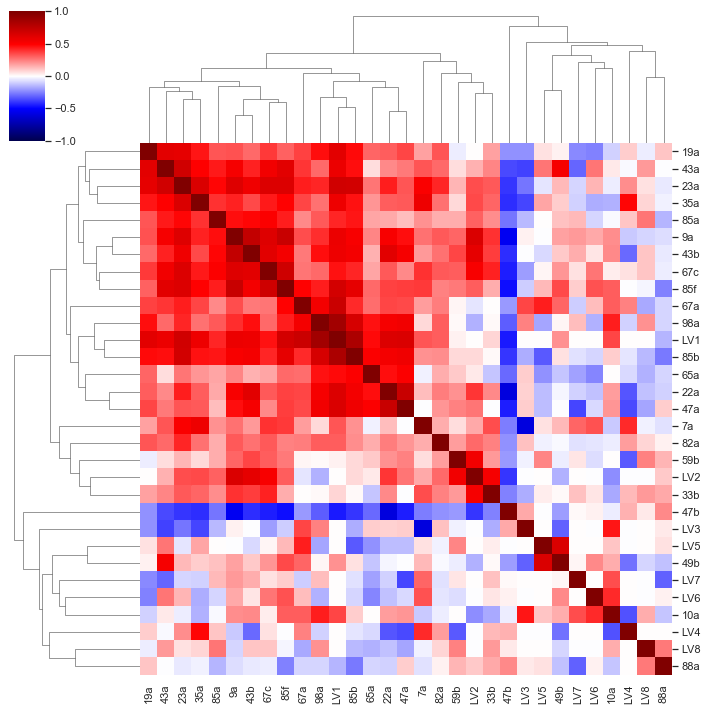

In [15]:
import seaborn as sns; sns.set(color_codes=True)

g = sns.clustermap(df_correlation.corr(), cmap="seismic", vmin=-1, vmax=1) #, annot= True, fmt = ".1f")


In [402]:
g.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/LinearRegression/SSR_23ORNs_wTSALE_Correlation_and_Clustering_PLSDA_8LVs_LinearReg.pdf", dpi=600)

In [ ]:
## Using the x_weights_ matrix to calculate the contribution of each ORN to the 4LVs
# df_weights = pd.DataFrame(x_PLSDA.x_loadings_,index=x_scaled.columns, columns=["LV1", "LV2", "LV3", "LV4"])
# g = sns.clustermap(df_weights, cmap="Reds", standard_scale=1)
# g.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/DimReduction/Clustering_usingTheLoadingsMatrix_PLSDA_4LVs.pdf", dpi=600)

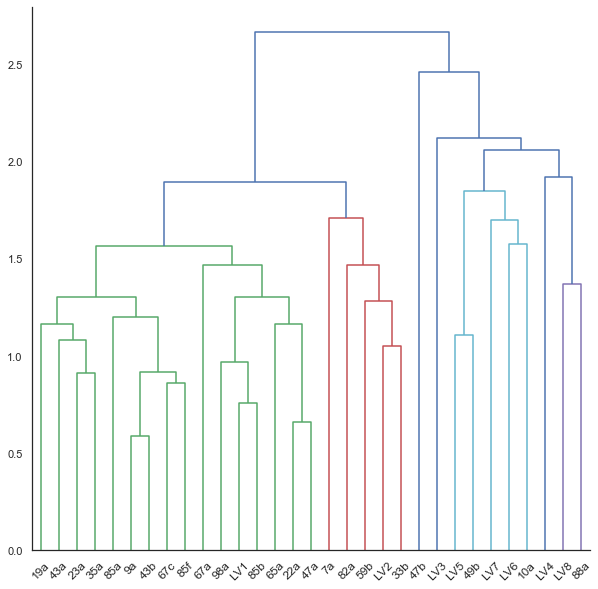

In [16]:
## Get the Cluster IDs for the variables
import scipy.cluster.hierarchy as hac
sns.set(style='white')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

# Z = linkage(df_correlation.corr())
a = hac.dendrogram(g.dendrogram_col.linkage, labels=df_correlation.corr().columns, ax=ax)
D = hac.fcluster(g.dendrogram_col.linkage, t=1.7, criterion='distance') #t=2.01
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
# fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/SSR_unscaled_dendrogram_PLSDA_4LVs.pdf", dpi=600)

In [22]:
## Little utility function I wrote to combine the variable names by cluster IDs
def combine_cluster(var_names, cluster_IDs):
    
    temp = {}
    
    for i in range(len(cluster_IDs)):
        
        if not cluster_IDs[i] in temp:
            temp[cluster_IDs[i]] = [var_names[i]]
            
        else:
            temp[cluster_IDs[i]].append(var_names[i])
            
    return temp

In [23]:
clusters = combine_cluster(df_correlation.corr().columns, D)

for key in sorted(clusters.keys()):
    print("%s: %s" % (key, clusters[key]))

1: ['LV1', '9a', '19a', '22a', '23a', '35a', '43a', '43b', '47a', '65a', '67a', '67c', '85a', '85b', '85f', '98a']
2: ['LV2', '7a', '33b', '59b', '82a']
3: ['49b']
4: ['LV3', '10a']
5: ['LV4']
6: ['88a']
7: ['47b']


## Correlation between odors and valence

In [13]:
SSR_df

,7a,9a,10a,19a,22a,23a,33b,35a,43a,43b,...,59b,65a,67a,67c,82a,85a,85b,85f,88a,98a
0,200,57,123,-15,32,-5,-5,83,36,12,...,6,-10,200,6,-10,7,37,49,-3,30
1,31,6,-14,125,52,3,29,26,-6,1,...,-8,2,84,7,12,-16,51,4,-2,140
2,-27,36,-17,-16,9,-8,-16,-12,77,35,...,-7,-18,57,2,-14,-14,27,31,-14,-21
3,10,62,254,5,32,-6,-16,10,37,10,...,5,12,184,35,-16,-25,22,84,-12,29
4,-18,20,-18,92,53,1,3,222,-13,28,...,-7,-4,44,11,35,4,56,10,-20,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-15,247,-5,-19,50,-4,36,4,-11,110,...,10,-6,13,35,24,13,16,9,0,8
106,3,22,19,30,117,3,22,7,5,7,...,29,7,20,12,19,-11,40,21,-5,13
107,-14,14,31,0,33,-8,-6,5,-9,8,...,25,2,5,12,-8,-9,14,7,0,4
108,-10,14,2,-10,7,-9,-3,-3,-5,3,...,6,-8,4,31,-7,-6,39,14,-1,1


In [14]:
## mean of the three intensities
df_23ORN_wTSALE_mean = pd.DataFrame(df_wTSALE_23ORNs.groupby(['ORNs'])['ES'].mean()).reset_index()

## remove 'OR' from the labels
df_23ORN_wTSALE_mean['ORNs'] = df_23ORN_wTSALE_mean['ORNs'].apply(lambda x: x[2:])
df_23ORN_wTSALE_mean = df_23ORN_wTSALE_mean.T

## make the Or names column names
new_header = df_23ORN_wTSALE_mean.iloc[0].values
df_23ORN_wTSALE_mean = df_23ORN_wTSALE_mean.iloc[1:]
df_23ORN_wTSALE_mean.columns = new_header

# ## generate a scaled version
# df_23ORN_wTSALE_mean_scaled = df_23ORN_wTSALE_mean.copy()
# scaler = preprocessing.StandardScaler()
# df_23ORN_wTSALE_mean_scaled = scaler.fit_transform(df_23ORN_wTSALE_mean_scaled.values.reshape(-1,1)).reshape(1,-1)

## order in the same way as SSR df
df_23ORN_wTSALE_mean = df_23ORN_wTSALE_mean[list(SSR_df.columns.values)]

# df_23ORN_wTSALE_mean_scaled = pd.DataFrame(df_23ORN_wTSALE_mean_scaled)
# df_23ORN_wTSALE_mean_scaled.columns = new_header
# df_23ORN_wTSALE_mean_scaled = df_23ORN_wTSALE_mean_scaled[list(SSR_df.columns.values)]

## transposing messes up the datatype, which causes error in the correlation analyses
## fixing the datatype back to float
df_23ORN_wTSALE_mean.loc['ES'] = df_23ORN_wTSALE_mean.loc['ES'].astype(float)
df_23ORN_wTSALE_mean = df_23ORN_wTSALE_mean.loc[df_23ORN_wTSALE_mean.index.repeat(110)]
df_23ORN_wTSALE_mean = df_23ORN_wTSALE_mean.reset_index(drop=True)

# df_23ORN_wTSALE_mean_scaled.loc[0] = df_23ORN_wTSALE_mean_scaled.loc[0].astype(float)
# df_23ORN_wTSALE_mean_scaled = df_23ORN_wTSALE_mean_scaled.loc[df_23ORN_wTSALE_mean_scaled.index.repeat(110)]
# df_23ORN_wTSALE_mean_scaled = df_23ORN_wTSALE_mean_scaled.reset_index(drop=True)

df_23ORN_wTSALE_mean[df_23ORN_wTSALE_mean.columns.to_list()] = df_23ORN_wTSALE_mean[df_23ORN_wTSALE_mean.columns.to_list()].astype(float)
# df_23ORN_wTSALE_mean_scaled[df_23ORN_wTSALE_mean_scaled.columns.to_list()] = df_23ORN_wTSALE_mean_scaled[df_23ORN_wTSALE_mean_scaled.columns.to_list()].astype(float)

df_23ORN_wTSALE_mean

,7a,9a,10a,19a,22a,23a,33b,35a,43a,43b,...,59b,65a,67a,67c,82a,85a,85b,85f,88a,98a
0,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362
1,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362
2,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362
3,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362
4,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362
106,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362
107,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362
108,-0.00933,0.091664,0.128509,0.065789,0.043685,0.038251,-0.093627,0.146726,0.039422,0.078901,...,0.011637,0.050872,0.00814,-0.01166,0.019777,0.080914,-0.031183,0.019671,-0.051867,-0.083362


In [15]:
## get the Pearson coefficient for each odor
odor_v_wTSALE_corr = SSR_df.corrwith(df_23ORN_wTSALE_mean, axis=1)
odor_v_wTSALE_corr = abs(odor_v_wTSALE_corr)
odor_v_wTSALE_corr

0      0.038233
1      0.287150
2      0.251452
3      0.150182
4      0.233269
         ...   
105    0.104427
106    0.127760
107    0.024815
108    0.207043
109    0.004185
Length: 110, dtype: float64

## Validation functions

In [271]:
def plot_validation_curve(train_scores, val_scores, param_name, param_range, score, logscale):

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(valid_scores, axis=1)
    val_scores_std = np.std(valid_scores, axis=1)
    
    sns.set(style='white')
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(1, 1, 1)
    lw = 1

    ax1.set_xlabel(r"%s" % (param_name), fontsize=20)
    ax1.set_ylabel("%s" % (score), fontsize=20)
#     ax1.set_ylim(0,1)
    
    if logscale == True:
        
        ax1.semilogx(param_range, train_scores_mean, label="Training score",
                     color="maroon", lw=lw)
        
        ax1.semilogx(param_range, val_scores_mean, label="Cross-validation score",
                 color="darkolivegreen", lw=lw)
        
    else:
        ax1.plot(param_range, train_scores_mean, label="Training score",
                     color="maroon", lw=lw)
        
        ax1.plot(param_range, val_scores_mean, label="Cross-validation score",
                 color="darkolivegreen", lw=lw)
        
#         ax1.set_xticklabels(param_range)
        
    ax1.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="maroon", lw=lw)

    ax1.fill_between(param_range, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1,
                     color="darkolivegreen", lw=lw)

    sns.despine()
    ax1.legend(loc="best", frameon=False)

    plt.show()
    
    return fig

In [ ]:
def calculate_hyperparameters(est, x, y, score, param_grid):
    from sklearn.model_selection import GridSearchCV
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = est, param_grid = param_grid, scoring=score,
                              cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(x_scaled, y_encoded)
    return grid_search.best_params_

In [ ]:
def confusion_plot(ytest, ypred, target_names):
    
    fig = plt.figure(figsize=(6,6))
    ax1 = fig.add_subplot(1, 1, 1)
    
    mat = confusion_matrix(_y, ypred)
    # mat_norm = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

    sns.heatmap(mat, square=True, annot=True, annot_kws = {'size':30}, fmt='d', 
                cbar=False, cmap='Blues', vmin=5, vmax=46,
                xticklabels=target_names,
                yticklabels=target_names,
                ax = ax1)

    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20);

    return fig

## Cross-validated predictions

In [15]:
def classifier_results(classifier, X, y, fname=False):
    
    from sklearn.metrics import classification_report
    from sklearn.model_selection import cross_val_predict

    ### Plot Cross-validated predictions (https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html)

    predicted = cross_val_predict(classifier, X, y, cv=10)

    target_names = ['neutral', 'valent']

    print(classification_report(y, predicted, target_names=target_names))
    print(confusion_matrix(y, predicted))
    t = confusion_plot(y, predicted, target_names)
    
    if fname:
                
        text_file = open("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + ".txt", "w")
        text_file.write(classification_report(_y, predicted, target_names=target_names))
        text_file.write('\n' + str(confusion_matrix(_y, predicted)))
        text_file.close()
        
        t.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + ".pdf", dpi=600) 
    
    return 

### True positive probabilities

In [ ]:
def probability_of_true(y, probs):
    
    true_probs = []
    for i in range(len(y)):
        true_probs.append(probs[i][y[i]])
    
    return true_probs

## Over-sampling to deal with the imbalance

In [ ]:
## Haven't applied this in the end!!!
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=448)
X_ros, y_ros = ros.fit_sample(x_scaled, y_encoded)

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(x_scaled, y_encoded)

In [ ]:
yy = y_ros
len(yy), yy.sum()

### Set GLOBAL X and Y

In [601]:
_X = x_PLSDA_4D.x_scores_
# _X = x_PCA_var_k_retained
# _X = x_twoDatasets
_y = y_twoDatasets

_X.shape

(110, 8)

In [602]:
_y


0     -0.53
1     -0.42
2     -0.40
3     -0.30
4     -0.28
       ... 
105    0.62
106    0.62
107    0.62
108    0.70
109    0.72
Name: Valence, Length: 110, dtype: float64

In [23]:
odor_v_wTSALE_corr.values.shape

(110,)

## Linear regression

In [138]:
pd.DataFrame(_X).to_csv('/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/LinearRegression/training_8LVs.csv',index=False)
# pd.DataFrame(_y).to_csv('/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/LinearRegression/target.csv',index=False)
# pd.DataFrame(odor_v_wTSALE_corr).to_csv('/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/LinearRegression/weights.csv', index=False)

In [608]:
from sklearn.linear_model import LinearRegression

# _X_scaled = preprocessing.scale(_X)

linearReg = LinearRegression(normalize=True).fit(_X, _y)#, sample_weight=odor_v_wTSALE_corr.values)
print(linearReg.score(_X, _y)) #, sample_weight=odor_v_wTSALE_corr.values)

y_pred = linearReg.predict(_X)
print(np.sqrt(mean_squared_error(_y, y_pred)))

cv_type = ShuffleSplit(n_splits=10, random_state=42)
cv = cross_val_score(linearReg, _X, _y, cv=cv_type, scoring = 'neg_root_mean_squared_error')
print("10-fold cross val RMSE:", cv.mean())


0.28793091902740287
0.19782192982708457
10-fold cross val RMSE: -0.20515141763792027


In [609]:
adjusted_R2(0.28793091902740275, n=110, p=8)


0.2315294076632366

In [354]:
_X

array([[ 9.02297548e+01, -9.62831887e+01, -5.25717444e+01,
         1.17066680e+01,  1.13528491e+02,  7.56567328e+01,
         5.01274019e+01, -3.39566720e+01],
       [ 5.41403947e+01, -1.05256012e+02, -7.76073004e+00,
         1.99257605e+01,  5.83792021e+00, -5.95757631e+01,
         2.37927957e+01, -1.20581277e+01],
       [-3.78747327e+01, -1.30873094e+02, -1.60756187e+02,
        -2.17452731e+02,  1.88921759e+02, -2.72215840e+01,
         1.39863053e+01, -3.61170957e+01],
       [ 6.06621844e+01, -9.21905311e+01,  5.95153220e+01,
        -5.73762702e+01,  1.01717233e+02,  1.01843864e+02,
         5.88509175e+00, -2.44946857e+01],
       [-7.92662722e+00,  1.48029238e+01, -1.55589403e+01,
         7.50518500e+01,  5.12675033e+01, -1.10999666e+02,
         3.31878608e+01, -3.52554481e+01],
       [ 2.37610242e+02, -9.03670992e+01, -2.83344316e+01,
         4.58895852e+00,  1.22452779e+01, -3.42288001e+01,
        -8.38600805e+01,  3.86355234e+01],
       [ 2.74812850e+02, -5.117233

In [607]:
from scipy import stats
import statsmodels.api as sm

X2 = sm.add_constant(_X)
est = sm.WLS(_y, X2)#, weights=odor_v_wTSALE_corr.values)
est2 = est.fit()
print(est2.summary())


                            WLS Regression Results                            
Dep. Variable:                Valence   R-squared:                       0.288
Model:                            WLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     5.105
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           2.38e-05
Time:                        18:56:50   Log-Likelihood:                 22.159
No. Observations:                 110   AIC:                            -26.32
Df Residuals:                     101   BIC:                            -2.015
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2083      0.020     10.581      0.0

In [407]:
with open('/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/LinearRegression/LinearRegResults_8LVs_Weighted.txt','w') as f:
    print(est2.summary(), file=f)

## SVR

In [420]:
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error

## make scorer
# MSE = make_scorer(mean_squared_error)

clf = svm.SVR(kernel='linear', C = 0.01) #C = 1.2
clf.fit(_X, _y)#, sample_weight=odor_v_wTSALE_corr.values)
# # clf.predict(_X)
# # clf.score(_X, _y, sample_weight=odor_v_wTSALE_corr.values)

cv_type = ShuffleSplit(n_splits=10, random_state=42)
cv = cross_val_score(clf, _X, _y, cv=cv_type, scoring = 'r2')
print("10-fold cross val RMSE:", (cv.mean()))

#param_name = "C"
#param_range = np.arange(0.01, 10, 0.05)

# # ## validation curve
# f1 = train_scores, valid_scores = validation_curve(clf, _X, _y, 
#                                               param_name, param_range,
#                                               cv=10,
#                                               scoring = score)

# plot_validation_curve(train_scores, valid_scores, param_name, param_range, score, logscale = False)

# learning curve
# param_name = "Training data"

# train_sizes, train_scores, valid_scores = learning_curve(svm.SVR(kernel = 'linear'), _X, _y,
#                                             cv=10,
#                                             scoring = 'mean_squared_error',
#                                             shuffle=True)

# f2 = plot_validation_curve(train_scores, valid_scores, param_name, train_sizes, score, logscale = False)

# fname = "SSR_alone_scaled_SVM_2_PLSDA_LV4_retained"
# conf_plt = classifier_results(clf, _X, _y, fname=False)

10-fold cross val RMSE: -0.22518971283532457


In [868]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1], 'epsilon':[0.1]} #}, 'degree':[5]}#
cv = GridSearchCV(svm.SVR(kernel='rbf'), parameters, scoring = MSE, cv= ShuffleSplit(random_state=42))
cv.fit(_X,_y, sample_weight = odor_v_wTSALE_corr.values)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1], 'epsilon': [0.1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error), verbose=0)

In [869]:
print(np.sqrt(cv.best_score_))
print("%.2f" % np.sqrt(cv.best_score_))


0.20390721913611184
0.20


In [499]:
cv.best_params_

{'alpha': 10, 'fit_intercept': True}

In [873]:
np.mean(_y)

0.20827272727272725

In [430]:
cv.best_params_

{'C': 0.1}

In [316]:
def adjusted_R2(R2, n, p):
    adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
    return adj_r2


In [447]:
adjusted_R2(0.19, 110, 8)


0.12584158415841573

### Learning Curves

In [820]:
from sklearn.linear_model import Ridge, Lasso

train_sizes, train_scores, test_scores = learning_curve(svm.SVR('linear', C=0.1), _X, _y,
                                            cv=ShuffleSplit(random_state=42),
                                            train_sizes=np.arange(0.1,1.1,0.1),
                                            scoring = MSE,
                                            shuffle = False)


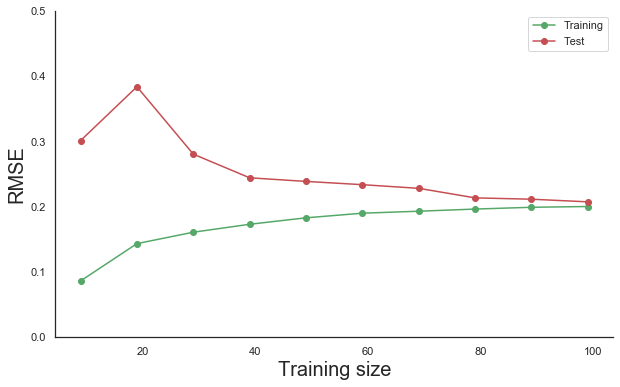

In [821]:
# Visualize learning curves

sns.set(style='white')
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1, 1, 1)
lw = 1 

ax1.plot(train_sizes, np.sqrt(train_scores).mean(1), 'o-', color="g",
         label="Training")

ax1.plot(train_sizes, np.sqrt(test_scores).mean(1), 'o-', color="r",
         label="Test")

# ax1.fill_between(train_sizes, np.sqrt(train_scores).mean(1) - np.std(np.sqrt(train_scores)),
#                  np.sqrt(train_scores).mean(1) + np.std(np.sqrt(train_scores)), alpha=0.1,
#                  color="darkolivegreen", lw=lw)

# ax1.fill_between(train_sizes, np.sqrt(test_scores).mean(1) - np.std(np.sqrt(test_scores)),
#                  np.sqrt(test_scores).mean(1) + np.std(np.sqrt(test_scores)), alpha=0.1,
#                  color="maroon", lw=lw)

plt.ylim(0,.5)
plt.ylabel('RMSE', size=20)
plt.xlabel('Training size', size=20)
ax1.legend(loc="best")
sns.despine()


In [747]:
train_scores.mean(1)

array([0.03682734, 0.03963281, 0.03849876, 0.0389207 , 0.04239291,
       0.04201559, 0.04316549, 0.0424937 , 0.04263702, 0.04247447])

In [767]:
fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/LearningCurves/Lasso.pdf", dpi=600) 


### Manual weighting of CV

In [283]:
# clf = svm.SVR(kernel='linear', C = 0.01, degree= 3, gamma='scale') #C = 1.2
clf = LinearRegression()
clf.fit(_X, _y)#, sample_weight=odor_v_wTSALE_corr.values)

# cv_type = ShuffleSplit(n_splits=10, random_state=42)
cv = cross_val_score(clf, _X, _y, cv=10, scoring = 'r2')
# print("10-fold cross val R2:", cv.mean())

# weighted_scores = cross_val_scores_weighted(clf, _X, _y, odor_v_wTSALE_corr.values) ## ,np.array([1]*110))#

In [275]:
weighted_scores[0]

[0.37601694076978387,
 -0.252258446998342,
 -2.204142716378753,
 0.5542874968921889,
 0.2289121727638146,
 0.262528883123616,
 -0.9958682623134221,
 0.4645576938808462,
 -0.822351239840839,
 -1.313386854752427]

In [270]:
import sklearn.linear_model
import numpy as np
from sklearn.model_selection import KFold
import sklearn.metrics

def cross_val_scores_weighted(model, X, y, weights, cv=10, metrics=[sklearn.metrics.r2_score]):
    kf = ShuffleSplit(n_splits=cv, random_state=42)
    kf.get_n_splits(X)
    scores = [[] for metric in metrics]
    for train_index, test_index in kf.split(X):
        model_clone = sklearn.base.clone(model)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        weights_train, weights_test = weights[train_index], weights[test_index]
        model_clone.fit(X_train,y_train,sample_weight=weights_train)
        y_pred = model_clone.predict(X_test)
        for i, metric in enumerate(metrics):
            score = metric(y_test, y_pred, sample_weight = weights_test)
            scores[i].append(score)
    return scores

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

logisticRegr_not_weighted = LogisticRegression(solver='liblinear', penalty='l2', max_iter=8000, C=.1).fit(_X, _y) #C=1.25
# r_not_weighted = logisticRegr_not_weighted.predict_proba(_X)
# pred_not_weighted = logisticRegr_not_weighted.predict(_X)

# logisticRegr_weighted = LogisticRegression(solver='liblinear', penalty='l2', max_iter=8000, C=.1).fit(_X, _y, sample_weight=odor_v_wTSALE_corr.values) #C=1.25
# r_weighted = logisticRegr_weighted.predict_proba(_X)
# pred_weighted = logisticRegr_weighted.predict(_X)


# classifier = logisticRegr_weighted
# score = "f1_weighted"

# cv1 = StratifiedShuffleSplit(n_splits=10, random_state=42)
# cv = cross_val_score(classifier, _X, _y, cv=cv1, scoring = score)

# # cv = cross_val_score(classifier, _X, _y, cv=10, scoring = score)

# print("10-fold cross val f1 score:", cv.mean())

# param_name = "C"
# param_range = np.arange(0.01, 20.0, 0.05)

# # ## validation curve
# train_scores, valid_scores = validation_curve(classifier, _X, _y, 
#                                               param_name, param_range,
#                                               cv=10,
#                                               scoring = score)

# f1 = plot_validation_curve(train_scores, valid_scores, param_name, param_range, score, logscale = False)

# ## learning curve
# param_name = "Training data"

# train_sizes, train_scores, valid_scores = learning_curve(classifier, _X, _y,
#                                             cv=10,
#                                             scoring = score,
#                                             shuffle=True)

# f2 = plot_validation_curve(train_scores, valid_scores, param_name, train_sizes, score, logscale = False)

# fname = "SSR_alone_unscaled_LogReg_0.1_PLSDA_LV4_retained"
# classifier_results(classifier, _X, _y, fname=False)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
c = LogisticRegression(solver='liblinear', penalty='l2', max_iter=8000, C=.1)

p1 = cross_val_predict(c, _X, _y, cv=10)
p1

In [ ]:
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=10) #, random_state=42)
p2 = cross_val_predict(c, _X, _y, cv=cv)
p2

In [ ]:
p3 = df_manual_cv['predictions'].values
p3

In [ ]:
p1-p2

In [ ]:
p3-p1

In [ ]:
confusion_matrix(_y, p3)

In [ ]:
f2.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + "learningCurve.pdf", dpi=600)

### Getting the decision boundaries

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

LV1_min, LV1_max = df_x_scores['LV1'].min() - 1, df_x_scores['LV1'].max() + 1
LV2_min, LV2_max = df_x_scores['LV2'].min() - 1, df_x_scores['LV2'].max() + 1
# LV3_min, LV3_max, LV3_mean = df_x_scores['LV3'].min() - 1, df_x_scores['LV3'].max() + 1, df_x_scores['LV3'].mean()
# LV4_min, LV4_max, LV4_mean = df_x_scores['LV4'].min() - 1, df_x_scores['LV4'].max() + 1, df_x_scores['LV4'].mean()

h = 4  # step size in the mesh
xx1, xx2 = np.meshgrid(np.arange(LV1_min, LV1_max, h), np.arange(LV2_min, LV2_max, h))
#                          np.repeat(LV3_mean, np.arange(LV3_min, LV3_max, h).shape[0]),
#                          np.repeat(LV4_mean, np.arange(LV4_min, LV4_max, h).shape[0]))

# Z = logisticRegr_weighted.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 
Z = logisticRegr_weighted.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1].reshape(xx1.shape) 

# Z = logisticRegr_weighted.predict_proba(np.c_[df_x_scores['LV1'], df_x_scores['LV2']])#[:,1].reshape(xx.shape) 



# probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

In [ ]:
xx1

In [ ]:
xx2

In [ ]:
X1

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contourf(xx1[:,:], xx2[:,:,], Z[:,:],50, cmap='Greys', vmin=0, vmax=1)


ax.scatter(df_x_scores['LV1'], df_x_scores['LV2'], c=_y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contourf(xx2[:,:], xx1[:,:,], Z[:,:],50, cmap='Greys', vmin=0, vmax=1)



In [ ]:
np.c_[xx1.ravel(), xx2.ravel()]

In [ ]:
Z

In [ ]:
xx1

In [ ]:
xx2

In [ ]:
xx1[:,:,:,:].shape

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contourf(xx1[1,:,:,:], xx2[:,1,:,:], Z[:,:,1,1],50, cmap="Blues", vmin=0, vmax=1)
# levels=[.5]

ax.scatter(df_x_scores['LV1'], df_x_scores['LV2'], c=_y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)



### Log Reg performance wout CV

In [ ]:
pred_weighted
pred_not_weighted


In [ ]:
target_names = ['neutral', 'valent']
from sklearn.metrics import classification_report

fname = "SSR_weighted_LogReg_0.1_PLSDA_LV4_retained"
predictions = pred_weighted

print(classification_report(_y, predictions, target_names=target_names))
print(confusion_matrix(_y, predictions))
t = confusion_plot(_y, predictions, target_names)

# text_file = open("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + ".txt", "w")
# text_file.write(classification_report(_y, predictions, target_names=target_names))
# text_file.write('\n' + str(confusion_matrix(_y, predictions)))
# text_file.close()

# t.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + ".pdf", dpi=600) 

In [ ]:
predictions

### Manual CV split to incorporate sample weights

In [ ]:
def cross_validated_predictions(X, y, sample_weights = None):
    from sklearn.model_selection import KFold


    cv = StratifiedKFold(n_splits=10) #, random_state=42)
    
    k_fold_predictions = []
    k_fold_true_labels = []
    k_fold_test_indices = []

    for train, test in cv.split(X, y):
        classifier = LogisticRegression(solver='liblinear', penalty='l2', max_iter=8000, C=.1)
        if not sample_weights is None:
            print('weighted')
            ## Fit the classifier on the training dataset
            classifier.fit(X[train], y[train], sample_weight = sample_weights[train])
            
        else:
            print('unweighted')
            classifier.fit(X[train], y[train])

        preds = classifier.predict(X[test])

        k_fold_predictions.extend(preds)
        k_fold_true_labels.extend(y[test])
        k_fold_test_indices.extend(test)
        
    return k_fold_predictions, k_fold_true_labels, k_fold_test_indices

In [ ]:
predictions, true, ind = cross_validated_predictions(_X, _y, sample_weights = None) # odor_v_wTSALE_corr.values)

In [ ]:
df_manual_cv = pd.DataFrame({"predictions": predictions, "true labels": true, "index" : ind})

In [ ]:
df_manual_cv

In [ ]:
target_names = ['neutral', 'valent']
from sklearn.metrics import classification_report

fname = "SSR_weighted_LogReg_0.1_PLSDA_LV4_retained"

true_labels = df_manual_cv['true labels']
predictions = df_manual_cv['predictions']

print(classification_report(true_labels, predictions, target_names=target_names))
print(confusion_matrix(true_labels, predictions))
t = confusion_plot(true_labels, predictions, target_names)

# text_file = open("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + ".txt", "w")
# text_file.write(classification_report(_y, predictions, target_names=target_names))
# text_file.write('\n' + str(confusion_matrix(_y, predictions)))
# text_file.close()

# t.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + ".pdf", dpi=600) 

### Probability analyses

In [ ]:
df_negative_probs = pd.DataFrame({'Not weighted': r_not_weighted[:,0],
             'Weighted': r_weighted[:,0]})
df_negative_probs['Class'] = y_twoDatasets.values

In [ ]:
df_negative_probs['Class'].unique()

In [ ]:
import scipy as sp
# linreg = sp.stats.linregress(df_negative_probs['Not weighted'], df_negative_probs['Weighted'])

sns.set(style='white')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

color_dict = dict({'neutral':sns.color_palette("Paired")[1],
                   'valent':sns.color_palette("Paired")[7]})

ax = sns.scatterplot(x='Not weighted', y='Weighted', hue = "Class", data=df_negative_probs,
                    s = 140, palette=color_dict)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c="grey")


ax.set_xlabel("Non-Weighted", fontsize = 18)
ax.set_ylabel("Weighted", fontsize = 18)

legend = ax.legend()
legend.texts[0].set_text("")
legend.draw_frame(False)

sns.despine()


plt.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/negative_probs_sample_weights_comparison.pdf", dpi=600)

In [ ]:
df_dabest = pd.concat([df_negative_probs[df_negative_probs['Class'] == 'valent']['Not weighted'],
                       df_negative_probs[df_negative_probs['Class'] == 'valent']['Weighted'],
                       df_negative_probs[df_negative_probs['Class'] == 'neutral']['Not weighted'],
                       df_negative_probs[df_negative_probs['Class'] == 'neutral']['Weighted']],
                        ignore_index=True, axis=1)

df_dabest.columns = ["valent_unweighted", "valent_weighted", "neutral_unweighted", "neutral_weighted"]
df_dabest['ID'] = np.arange(0,len(df_dabest))
df_dabest

In [ ]:
import dabest

# Load the above data into `dabest`.
df_dabest_plot = dabest.load(data=df_dabest, paired=True, id_col ="ID",
                          idx=(("valent_unweighted", "valent_weighted"), 
                               ("neutral_unweighted", "neutral_weighted")))

# Produce a Cumming estimation plot.
dbplot = df_dabest_plot.mean_diff.plot();
dbtable = df_dabest_plot.mean_diff

In [ ]:
# dbplot.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/dabest_pairedPlot.pdf", dpi=600)

# text_file = open("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/dabest_pairedPlot_table.txt", "w")
# text_file.write(str(dbtable))
# text_file.close()

## SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import mean_squared_error

clf = svm.SVC(kernel='rbf', C = .5, degree= 4, gamma='scale', probability=True) #C = 1.2

# score = 'neg_mean_squared_error'
score = 'f1_weighted'

cv1 = StratifiedShuffleSplit(n_splits=10, random_state=42)
cv = cross_val_score(clf, _X, _y, cv=cv1, scoring = score)

print("10-fold cross val f1 score:", cv.mean())

param_name = "C"
param_range = np.arange(0.01, 10, 0.05)

# # ## validation curve
f1 = train_scores, valid_scores = validation_curve(clf, _X, _y, 
                                              param_name, param_range,
                                              cv=10,
                                              scoring = score)

plot_validation_curve(train_scores, valid_scores, param_name, param_range, score, logscale = False)

# # # ## learning curve
# # param_name = "Training data"

# train_sizes, train_scores, valid_scores = learning_curve(clf, _X, _y,
#                                             cv=10,
#                                             scoring = score,
#                                             shuffle=True)

# f2 = plot_validation_curve(train_scores, valid_scores, param_name, train_sizes, score, logscale = False)

fname = "SSR_alone_scaled_SVM_2_PLSDA_LV4_retained"
conf_plt = classifier_results(clf, _X, _y, fname=False)

In [ ]:
f2.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + "learningCurve.pdf", dpi=600)

## Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(var_smoothing=1e-09) #C = 1.2

# score = 'neg_mean_squared_error'
score = 'f1_weighted'

cv1 = StratifiedShuffleSplit(n_splits=10, random_state=42)
cv = cross_val_score(GNB, _X, _y, cv=cv1, scoring = score)

print("10-fold cross val f1 score:", cv.mean())

param_name = "C"
param_range = np.arange(0.01, 8, 0.05)

## validation curve
# f1 = train_scores, valid_scores = validation_curve(GNB, _X, _y, 
#                                               param_name, param_range,
#                                               cv=10,
#                                               scoring = score)

# plot_validation_curve(train_scores, valid_scores, param_name, param_range, score, logscale = False)

# ## learning curve
# param_name = "Training data"

train_sizes, train_scores, valid_scores = learning_curve(GNB, _X, _y,
                                            cv=10,
                                            scoring = score,
                                            shuffle=True)

f2 = plot_validation_curve(train_scores, valid_scores, param_name, train_sizes, score, logscale = False)

fname = "SSR_alone_scaled_SVM_2_PLSDA_LV4_retained"
conf_plt = classifier_results(GNB, _X, _y, fname=False)

## ROC curve

In [24]:
## try simple ROC curves
import scikitplot as skplt

# y_true = # ground truth labels
# y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(_y, r_weighted)
plt.show()

NameError: name 'r_weighted' is not defined

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

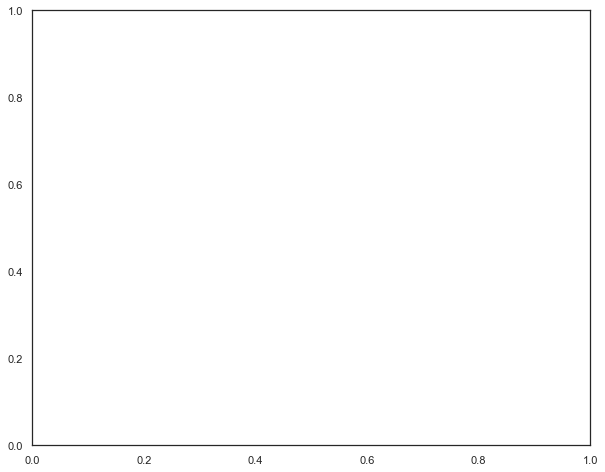

In [25]:
## Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

from numpy import interp
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# Set the CV instance to split the data into train-test in the for loop
cv = StratifiedShuffleSplit(n_splits=10, random_state=42)
# classifier = svm.SVC(kernel='linear', C=2, probability=True)
# classifier = GaussianNB()
# classifier = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=8000, C=.1)
                     
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

for i, (train, test) in enumerate(cv.split(_X, _y)):
    ## Fit the classifier on the training dataset
    classifier.fit(_X[train], _y[train], sample_weight = odor_v_wTSALE_corr.values[train])
    
    ## Plot the ROC curve for the test set
    viz = plot_roc_curve(classifier, _X[test], _y[test],
                         name='ROC fold {}'.format(i+1),
                         alpha=0.3, lw=1, ax=ax)
    
    ## Get the ROC values of the test set
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='-.', lw=.5, color='k',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(mean_fpr, mean_tpr, color=sns.color_palette("Paired")[7],
        label=r'Mean ROC(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,)
                #label=r'$\pm$ 1 STD')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05]),
#        title="Receiver operating characteristic (ROC)")
ax.legend(loc="lower right")
ax.legend().draw_frame(False)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [ ]:
fig.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/" + fname + "_ROC_curve.pdf", dpi=600)

## Optimization-Grid Search

In [ ]:
## https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-3, 9, 13)
gamma_range = np.logspace(-9, 3, 13)
degree_range = np.arange(3, 16, 1)

# param_grid = dict(C=C_range)
param_grid = dict(gamma=gamma_range, C=C_range)
# param_grid = dict(C=C_range, degree=degree_range)

# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# cv = cross_val_score( _X, _y, cv=10, scoring = score)

grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=10, scoring='f1_weighted')
# grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=10000), param_grid=param_grid, cv=10, scoring='f1')
grid.fit(_X, _y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

#  Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
sns.set(style='white')
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('degree')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(degree_range)), degree_range, rotation=45)
# plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation F1 score')

# plt.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/SVM_Poly_upsampled_Heatmap.pdf", dpi=600)
plt.show()

## Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform", random_state=359)

score = "f1"

cv = cross_val_score(dummy_clf, _X, _y, cv=10, scoring = score)

print("10-fold cross val f1 score:", cv.mean())

# param_name = "C"
# param_range = np.arange(0.1, 2, 0.1)
# # param_range = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 4]

# # ## validation curve
# f = train_scores, valid_scores = validation_curve(dummy_clf, _X, _y, 
#                                               param_name, param_range,
#                                               cv=10,
#                                               scoring = score)

# plot_validation_curve(train_scores, valid_scores, param_name, param_range, score, logscale = False)

## learning curve
param_name = "Training data"

train_sizes, train_scores, valid_scores = learning_curve(dummy_clf, _X, _y,
                                            cv=10,
                                            scoring = score,
                                            shuffle=True)

f = plot_validation_curve(train_scores, valid_scores, param_name, train_sizes, score, logscale = False)

In [ ]:
f.savefig("/Users/Tayfun/Desktop/Codes/OdorValPrediction/Plots/Dummy_classifier_upsampled_rando359_learningCurve.pdf", dpi=600)

## Visulaize the ML results

In [ ]:
df_predictions = pd.DataFrame({'Odor':df_transformed_mean['Odorant'], 'Attraction Index':df_transformed_mean['Attraction index'],
             'p-val':df_transformed_mean['Level of significance'], 'Predictions': predicted,
             'p-val encoded':y_encoded}, 
             columns=['Odor','Attraction Index','p-val','Predictions','p-val encoded'])

df_predictions['Prediction'] = np.where(df_predictions['Predictions']==1, 'valent', 'neutral')
del df_predictions['Predictions']
del df_predictions['p-val encoded']
df_predictions.to_excel('/Users/Tayfun/Desktop/Codes/Prediction_table.xls')